In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Create Color Palette

In [5]:
# hexColors = ['#ff603b', '#f97750', '#f18b65', '#e79e7a', '#dbaf8f', '#cbc0a5', '#b7d0bb', '#9de0d1', '#75f0e8', '#00ffff']
hexColors = ['#FD5151', '#FBDE60', '#A3DEAE', '#39B4C8', '#2B5FC1']
# hexColors.reverse()

In [6]:
def hex2RGB(hexc):
    h = hexc.lstrip('#')
    return [int(h[i:i+2], 16) for i in (0, 2, 4)]

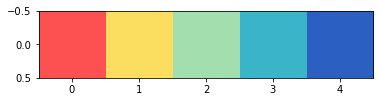

In [7]:
# Colors = [[88,95,244],[226,158,0],[255,102,0],[219,4,15],[0,0,0]]
Colors = [hex2RGB(i) for i in hexColors]
p = np.array(list(map(lambda x: [x], Colors)))
plt.imshow(p.reshape((p.shape[1],p.shape[0],3)))


# The Two Different Algorithms

### Block Matching

In [8]:
def genDepthBM(imgL,imgR,number_dispisparities=64, block_size=15):
    # Create the instance of Block Matching Algorithm
    stereo = cv.StereoBM_create(numDisparities=number_dispisparities, blockSize=block_size)
    # Calculate Disparity
    disparity = stereo.compute(imgL,imgR)
    mind = np.min(disparity)
    maxd = np.max(disparity)
    # Normalize data to [0,1]
    disparity = disparity+abs(mind)
    disparity = disparity / (maxd+abs(mind))
    return disparity

### Semi-Global Block Matching

In [61]:
def genDepthSGBM(imgL,imgR,number_dispisparities=64, block_size=15):
    stereo = cv.StereoSGBM_create(numDisparities=number_dispisparities, blockSize=block_size)
    disparity = stereo.compute(imgL,imgR)
    mind = np.min(disparity)
    maxd = np.max(disparity)
    disparity = np.array(disparity+abs(mind),dtype=np.double)
    disparity = disparity / (maxd+abs(mind))
    return disparity

# Generate Color Map

In [10]:
def genColor(pixel,nmin,nmax,colorP):
    steps = len(colorP)
    pos = pixel/nmax
    return np.array(colorP[int(steps*pos)-1])/255
    

In [58]:
def genColorMap(depth,colorPlatte):
    colorMap = np.zeros((depth.shape[0],depth.shape[1],3))
    mind = np.min(depth)
    maxd = np.max(depth)
    for i in range(colorMap.shape[0]):
        for j in range(colorMap.shape[1]):
            colorMap[i,j] = genColor(depth[i,j],mind,maxd,colorPlatte)
    return colorMap

# Number Disparties and Block Size

In [82]:
left_img ='left.png'
right_img ='right.png'
blockSize = 5
numberDisp = 80

# Different Number of Disparity

In [71]:
imgL = cv.imread(left_img,0)
imgR = cv.imread(right_img,0)
ratio = imgL.shape[0]/imgL.shape[1]

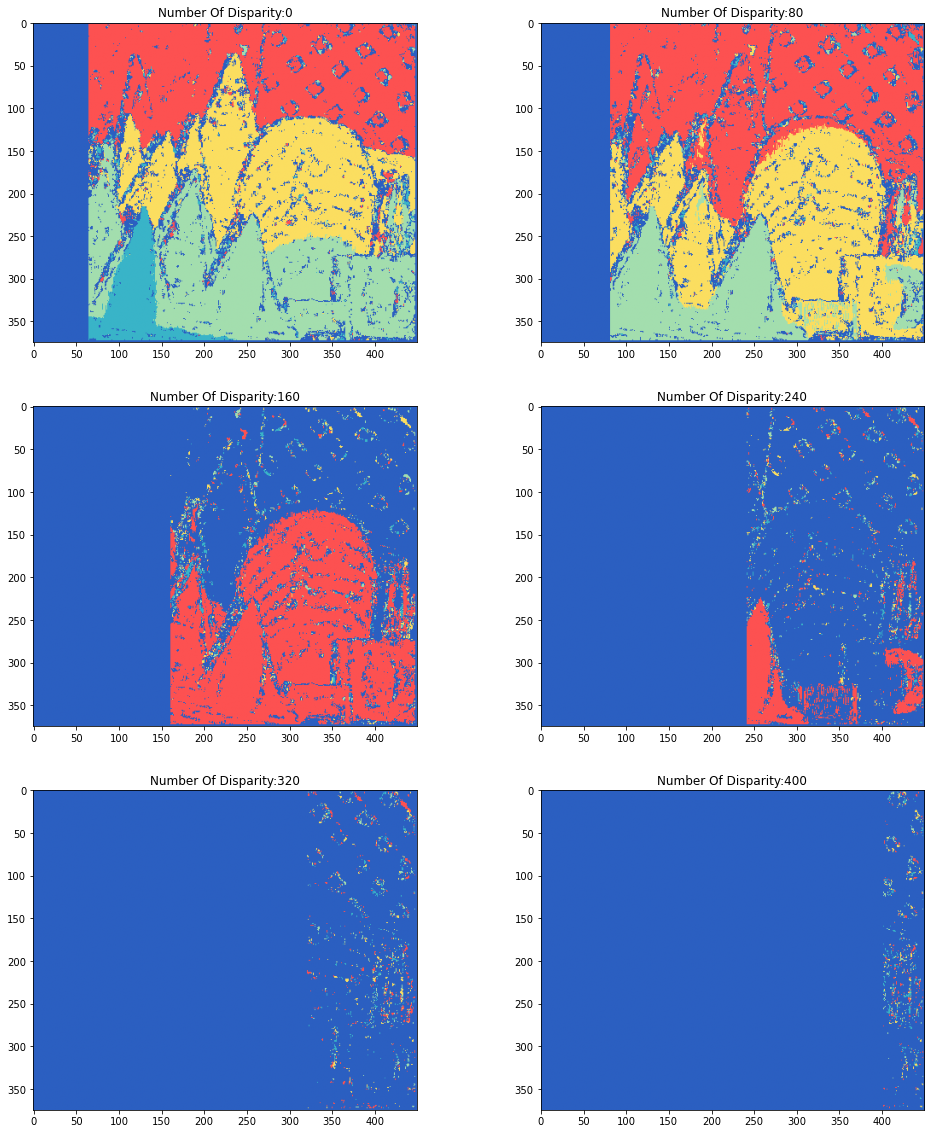

In [77]:
N = 6
fig ,axs =plt.subplots(N//2,2,figsize=(20*ratio,20))
c=0
for i in range(N//2):
    for j in range(2):
        nd = 16*(N-1)*c
        depth = genDepthBM(imgL,imgR,number_dispisparities=nd, block_size=blockSize)
        axs[i][j].imshow(genColorMap(depth,Colors))
        axs[i][j].set_title("Number Of Disparity:"+str(nd))
        c+=1
plt.show()

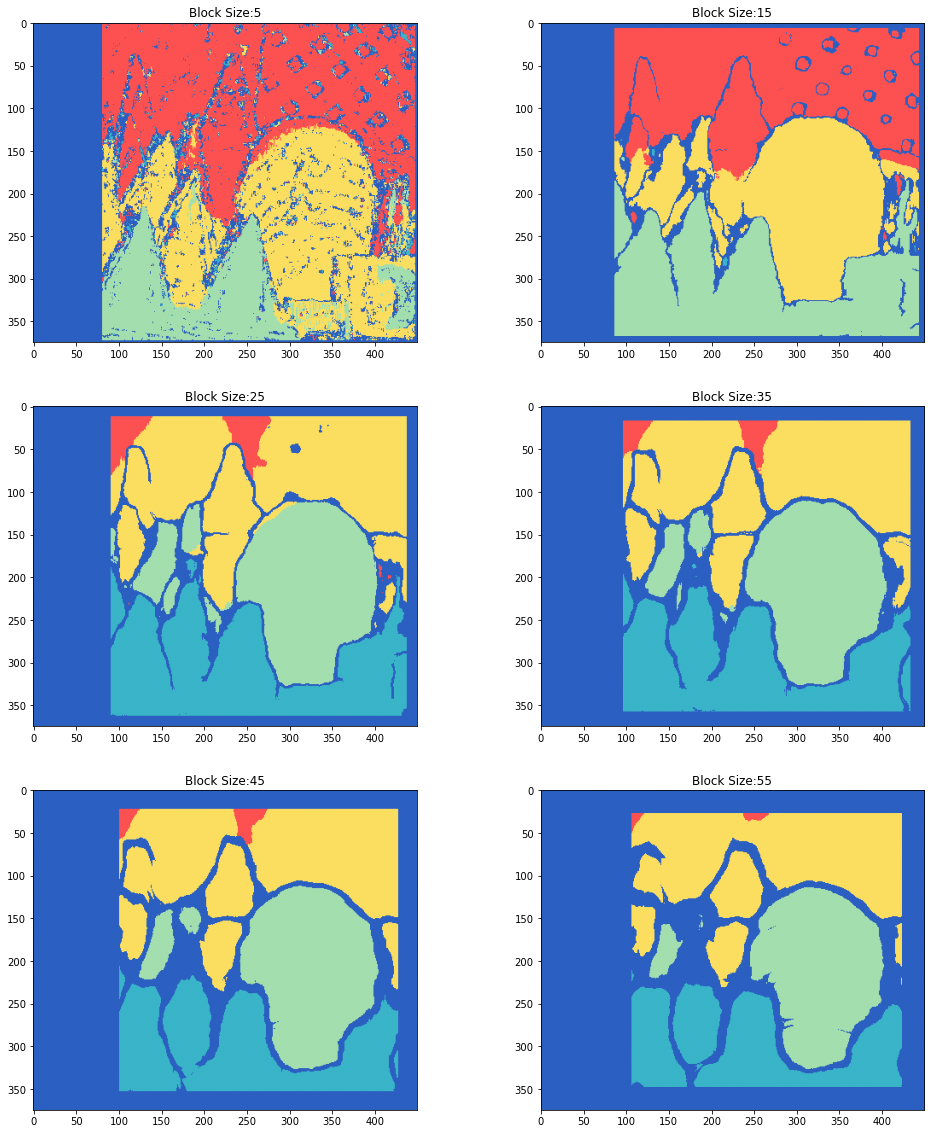

In [83]:
N = 6
fig ,axs =plt.subplots(N//2,2,figsize=(20*ratio,20))
c=0
for i in range(N//2):
    for j in range(2):
        bs = 5+2*(N-1)*c
        depth = genDepthBM(imgL,imgR,number_dispisparities=numberDisp, block_size=bs)
        axs[i][j].imshow(genColorMap(depth,Colors))
        axs[i][j].set_title("Block Size:"+str(bs))
        c+=1
plt.show()

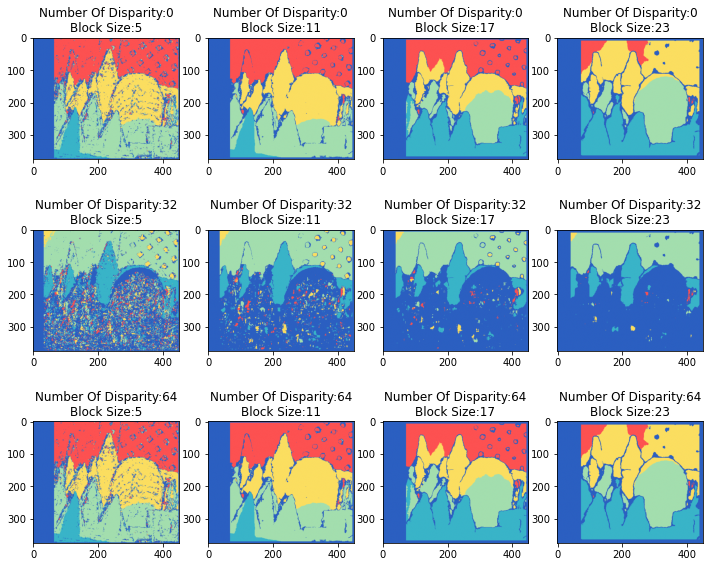

In [81]:
Nx = 3
Ny = 4
fig ,axs =plt.subplots(Nx,Ny,figsize=(12,12*ratio))
for i in range(Nx):
    for j in range(Ny):
        nd = 16*(Nx-1)*i
        bs = 5+2*(Ny-1)*j
        depth = genDepthBM(imgL,imgR,number_dispisparities=nd, block_size=bs)
        axs[i][j].imshow(genColorMap(depth,Colors))
        axs[i][j].set_title("Number Of Disparity:"+str(nd)+"\nBlock Size:"+str(bs))
plt.show()

# Result of two Algorithms

In [12]:
left_img ='swordL.png'
right_img ='swordR.png'
blockSize = 7
numberDisp = 256

In [13]:
imgL = cv.imread(left_img,0)
imgR = cv.imread(right_img,0)
depth_bm = genDepthBM(imgL,imgR,number_dispisparities=numberDisp, block_size=blockSize)
# depth_sgbm = genDepthSGBM(imgL,imgR,number_dispisparities=numberDisp, block_size=blockSize)

color_depth_bm = genColorMap(depth_bm,Colors)
# color_depth_sgbm = genColorMap(depth_sgbm,Colors)

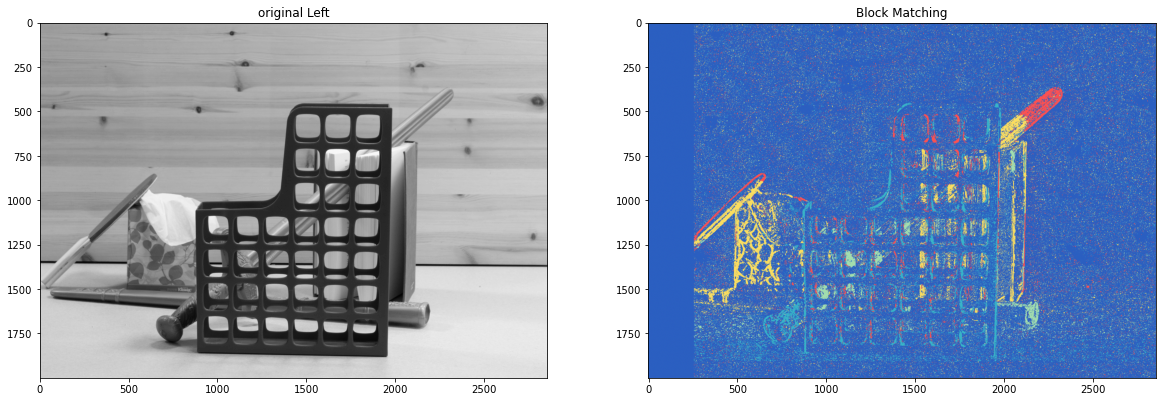

In [14]:
fig , axs = plt.subplots(1,2,figsize=(20,10))
axs[0].imshow(imgL,cmap="gray")
axs[0].set_title('original Left')
axs[1].imshow(color_depth_bm)
axs[1].set_title('Block Matching')
# axs[2].imshow(color_depth_sgbm)
# axs[2].set_title('Semi-Global Block Matching')
plt.show()